<a href="https://colab.research.google.com/github/Jayantsharma31/Data-Science-Portfolio/blob/master/flight_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### In this project we will be predicting the Fare of a flight a person has to give using the Machine Learning techniques.

# We know that Flight TIckets are very unpredictable and are very hard to guess. It sometimes changes on daily basis.

**basic checks from excel**
1. airline attribute is a categorical column.
2. date of journey- only for the year 2019 and for months 3,4,5,6
3. source - categorical column with only 5 cities
4. route- one blank cell
5. destination- categorical column with 5 cities
6. arrival time- some entries has month attached to them.
7. total_stops- one blank cell


*for one entry both route and total_stops data is missing*

**so we have prices of flight tickets for various airlines between the month of march and june of 2019 between various cities** 

# mounting the google drive on colab

In [11]:
#loading the drive and mounting
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
df=pd.read_csv("/content/drive/MyDrive/DATAMITES_INTERNSHIP/internship_dataset/flight_fare_data/Flight_Fare.csv")



In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
 df.shape
 #so our data has 10683 rows and 11 column

(10683, 11)

In [16]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### FEATURES: 

#### Airline: The name of the airline.

#### Date_of_Journey: The date of the journey

#### Source: The source from which the service begins.

#### Destination: The destination where the service ends.

#### Route: The route taken by the flight to reach the destination.

#### Dep_Time: The time when the journey starts from the source.

#### Arrival_Time: Time of arrival at the destination.

#### Duration: Total duration of the flight.

#### Total_Stops: Total stops between the source and destination.

#### Additional_Info: Additional information about the flight

#### Price: The price of the ticket

 # data analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# we see that route and total_stops has one null value,

In [18]:
df['Route'].isnull().sum()

1

In [19]:
df['Total_Stops'].isnull().sum()

1

## airline column

In [20]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

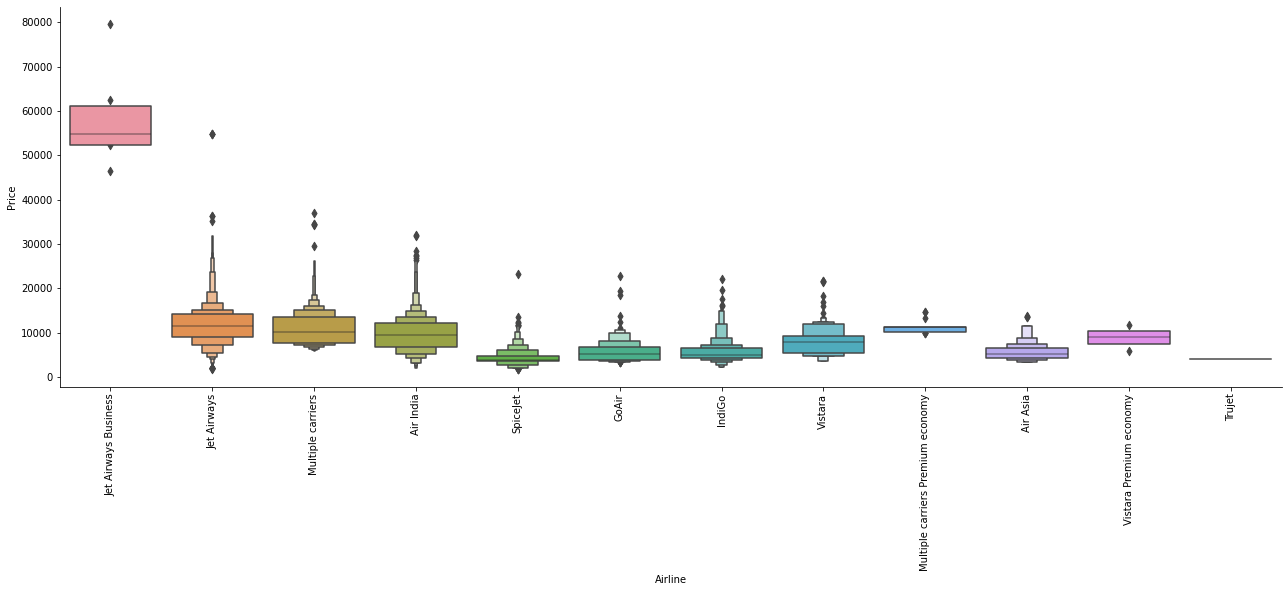

In [21]:
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# we can see that jet airways has maximum number of flights and also have maximum price range

# **SOURCE**

In [22]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

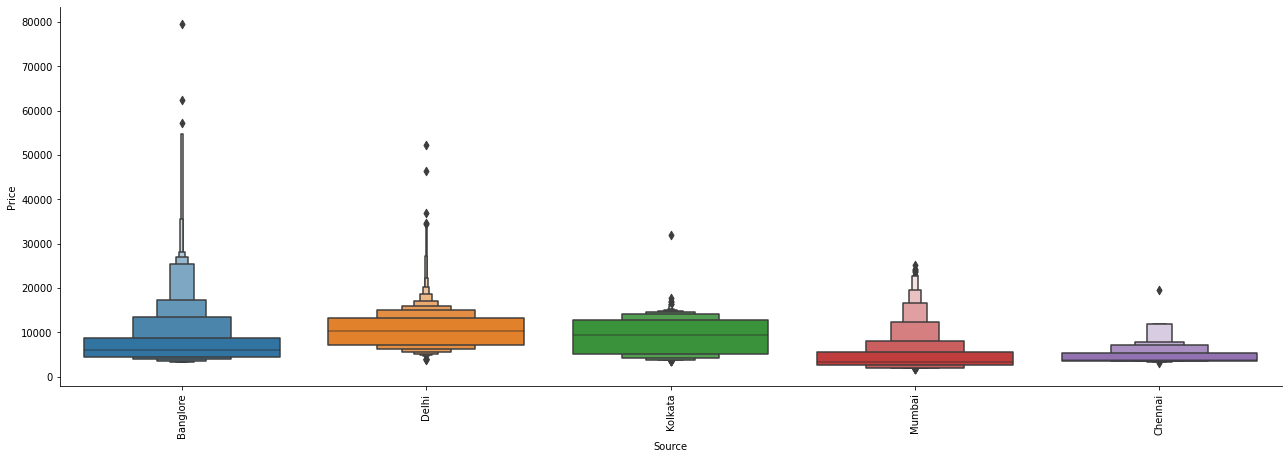

In [23]:
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# maximum flights have source as delhi but the average price of all the source are almost same

banglore and delhi have high quartile range

# ***DESTINATION***

In [24]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

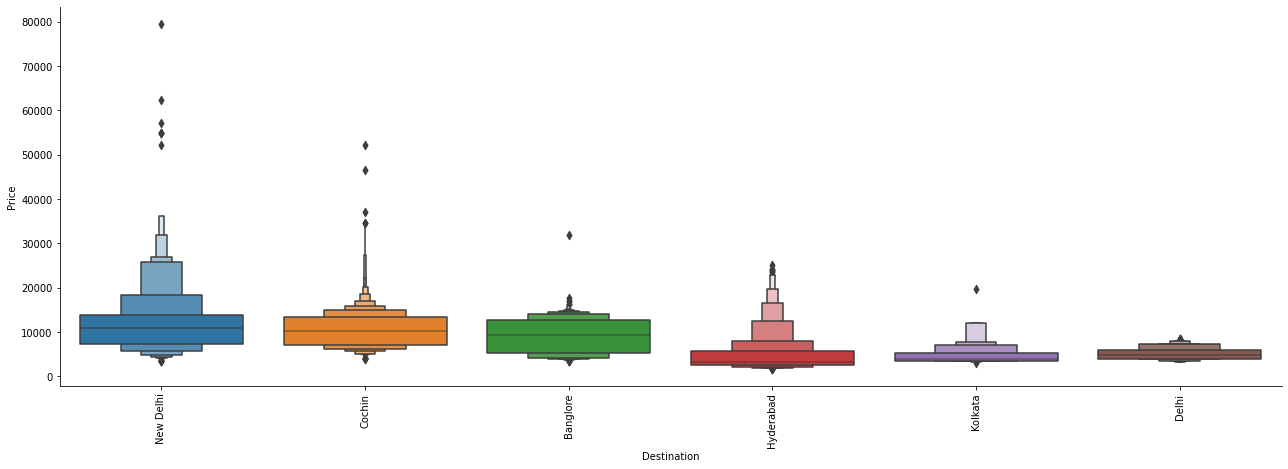

In [25]:
sns.catplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# we can see that there are two destination one is Delhi and other one is New Delhi,so we will combine them as they are the same destination

In [26]:
df['Destination']=df['Destination'].replace('New Delhi','Delhi')

In [27]:
df['Destination'].value_counts()  

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# successfully merged the two
# checking again fot catplot

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

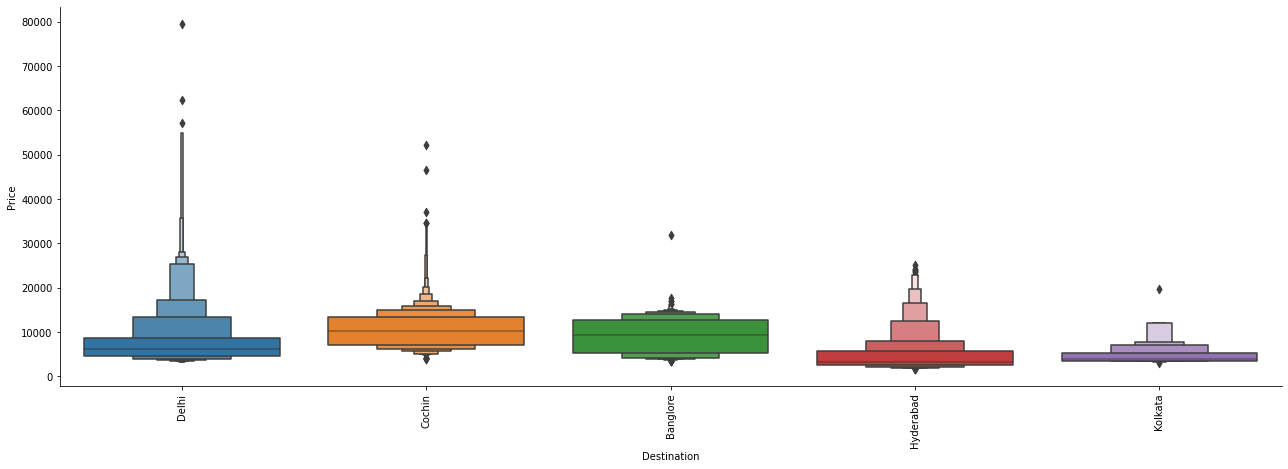

In [28]:
sns.catplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# ***DURATION***

In [29]:
df['Duration'].value_counts().unique()
#so all duration are different

array([550, 386, 337, 329, 261, 238, 220, 158, 135,  98,  97,  89,  88,
        86,  85,  81,  79,  78,  72,  71,  68,  65,  64,  63,  62,  61,
        60,  57,  56,  54,  53,  52,  51,  50,  49,  48,  47,  45,  44,
        42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,
        29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1])

In [30]:
df['Duration'].value_counts().nunique()
#it has 81 unique values

81

# ***ROUTE***

In [31]:
df['Route'].value_counts().unique()

array([2376, 1552,  979,  724,  621,  565,  402,  381,  326,  240,  232,
        213,  205,  146,   99,   83,   71,   65,   58,   56,   53,   50,
         46,   44,   42,   41,   40,   39,   37,   36,   33,   30,   29,
         28,   25,   21,   20,   19,   18,   17,   16,   15,   13,   12,
         11,   10,    9,    8,    7,    6,    5,    4,    3,    2,    1])

In [32]:
df['Route'].value_counts().nunique()
#it has 55 unique values

55

# ***TOTAL STOPS***

In [33]:
df['Total_Stops'].value_counts()  

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

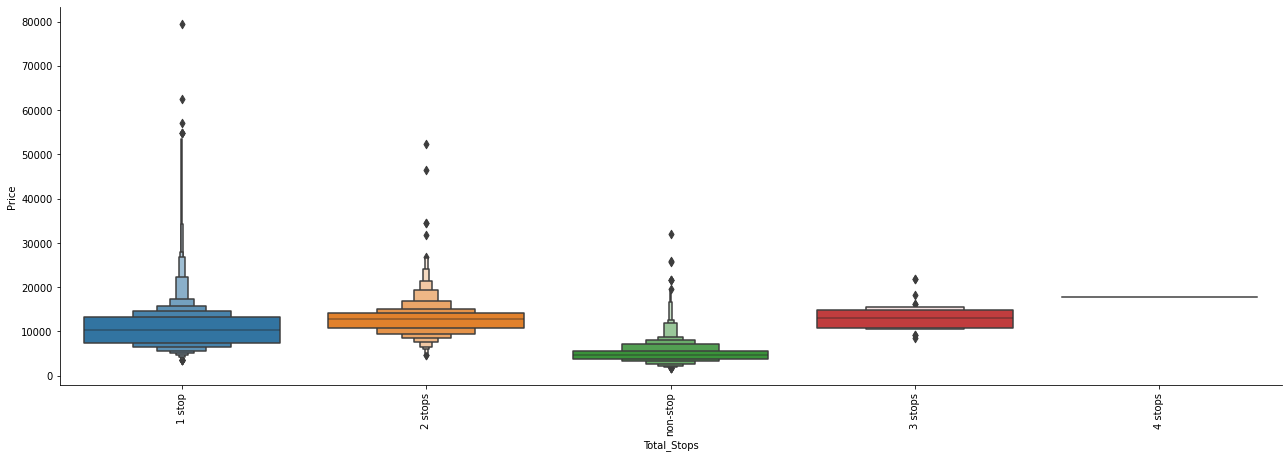

In [34]:
sns.catplot(y='Price',x='Total_Stops',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# here also avg price for all is almost same hence can be seen that no of stops doesn't have much impact on prices

# ***ADDITIONAL INFO***

In [35]:
df['Additional_Info'].value_counts()  

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

# we can see we have two NO INFO here so we will merge them

In [36]:
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

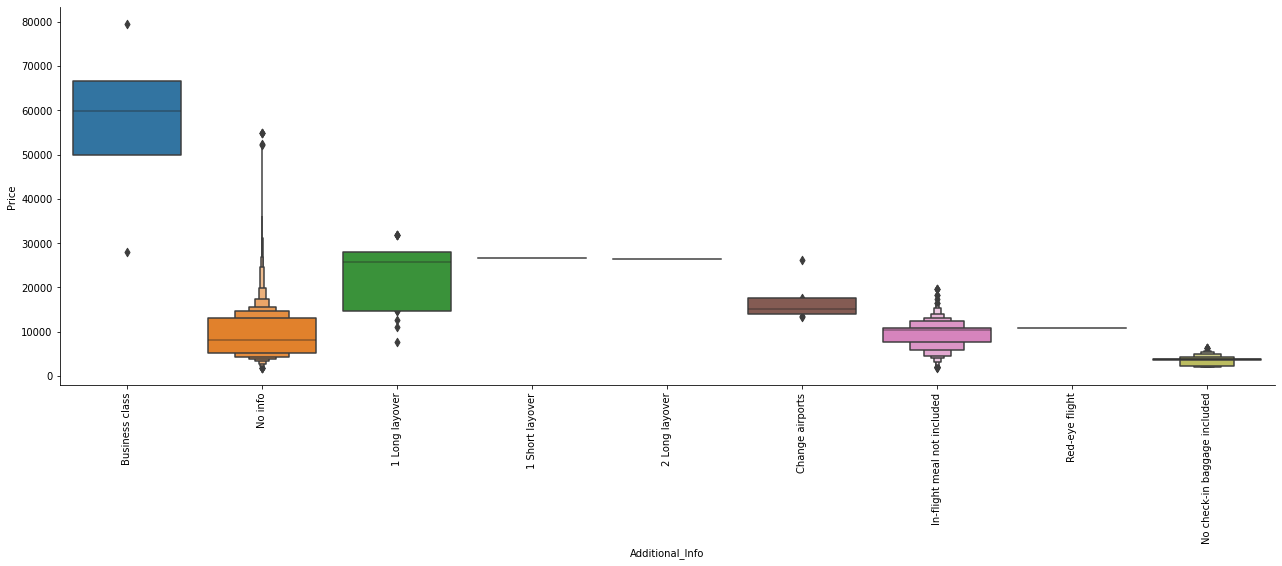

In [37]:
sns.catplot(y='Price',x='Additional_Info',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.xticks(rotation='vertical')

# count plot

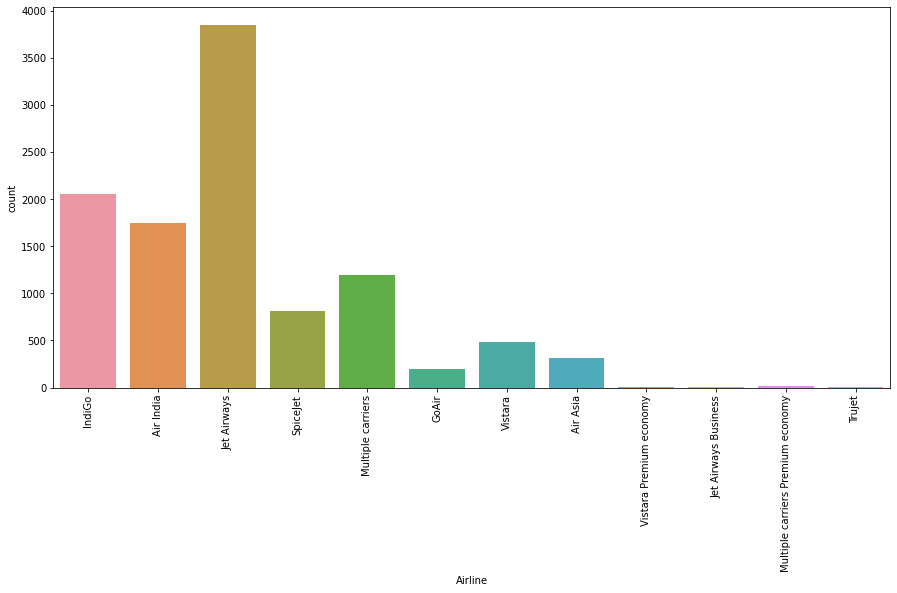

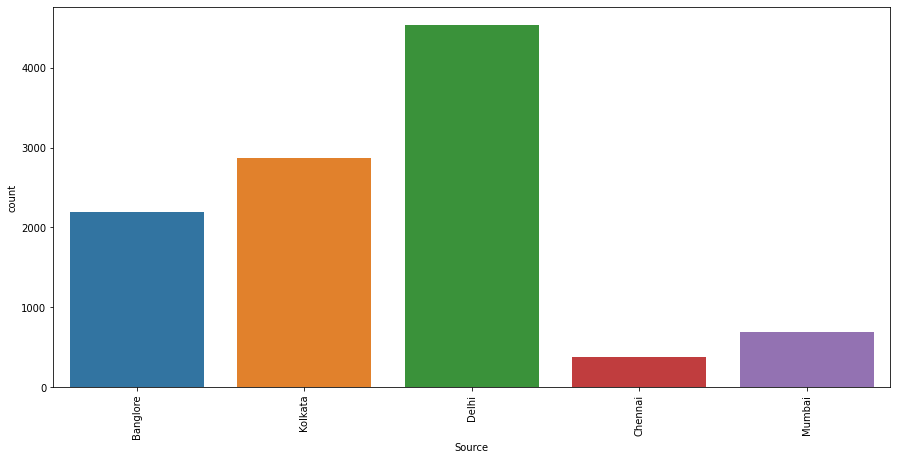

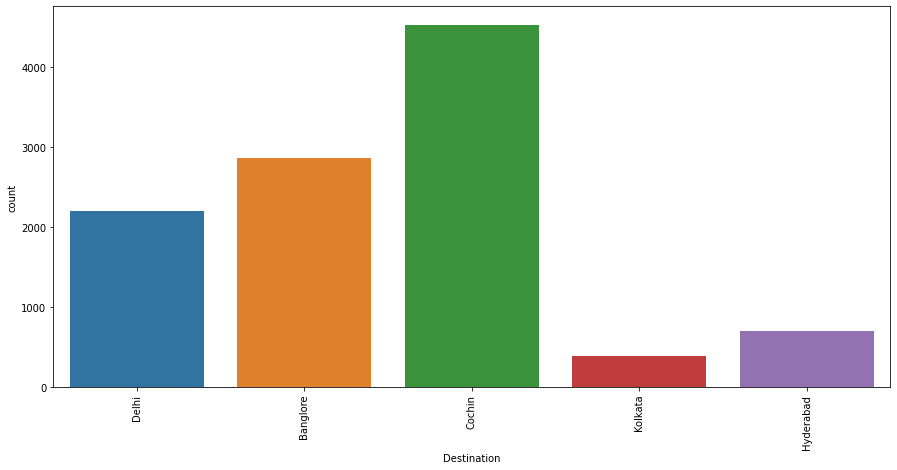

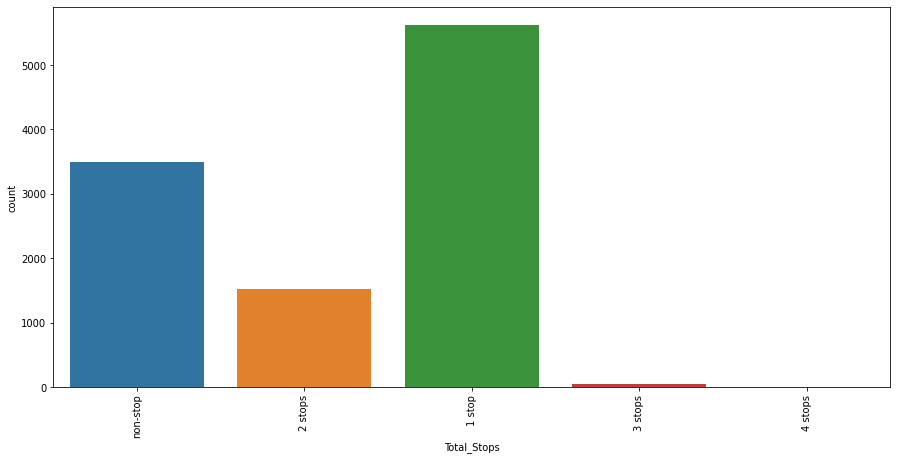

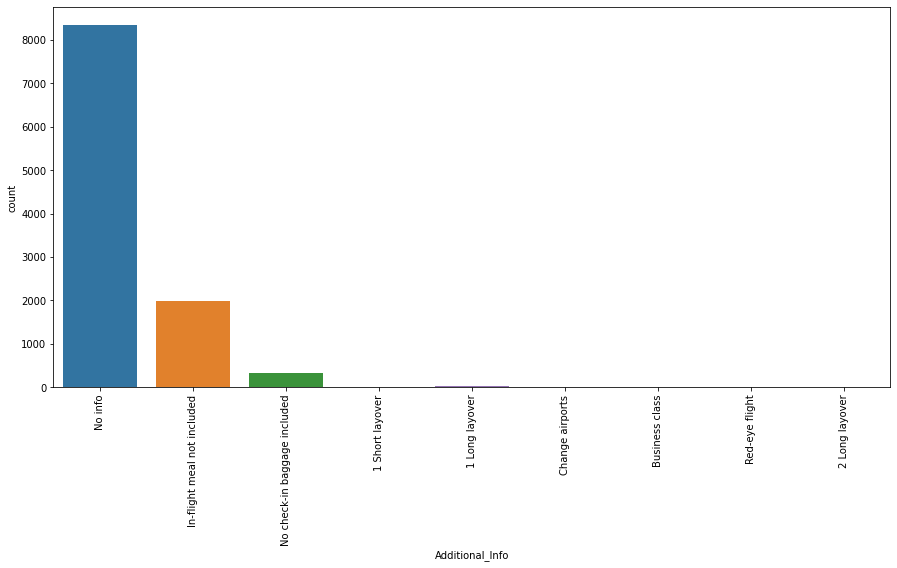

In [38]:
#def a function to look at count plot of some important categorical variable
def drawplot(col):
  plt.figure(figsize=(15,7))
  sns.countplot(x=df[col])
  
  plt.xticks(rotation='vertical')

tolook=['Airline','Source','Destination','Total_Stops','Additional_Info']
for col in tolook:
  drawplot(col)

# bar plot

# lets see relation between price and various column

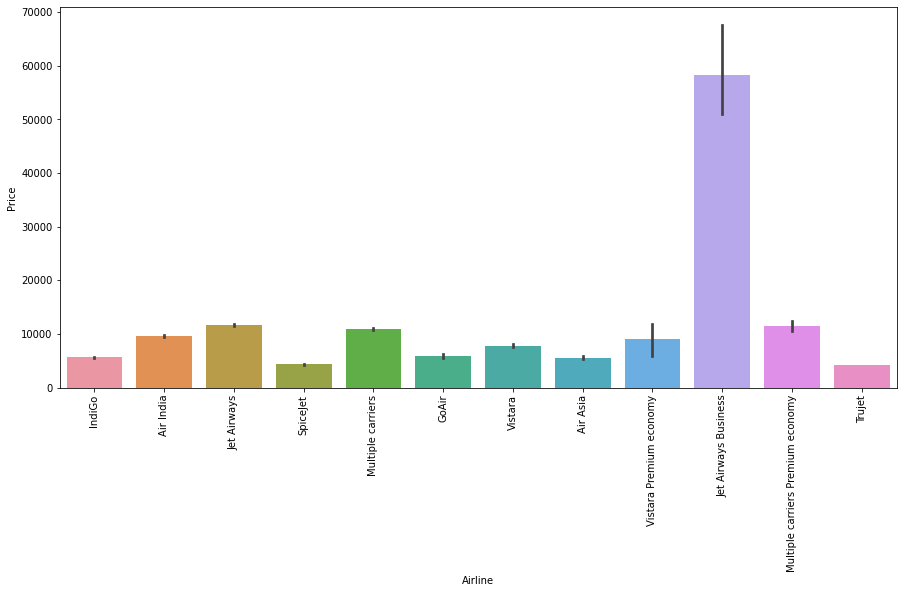

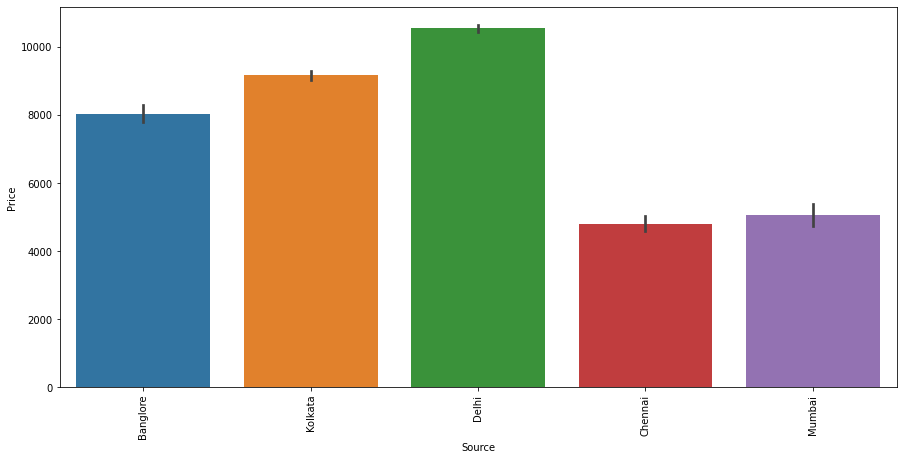

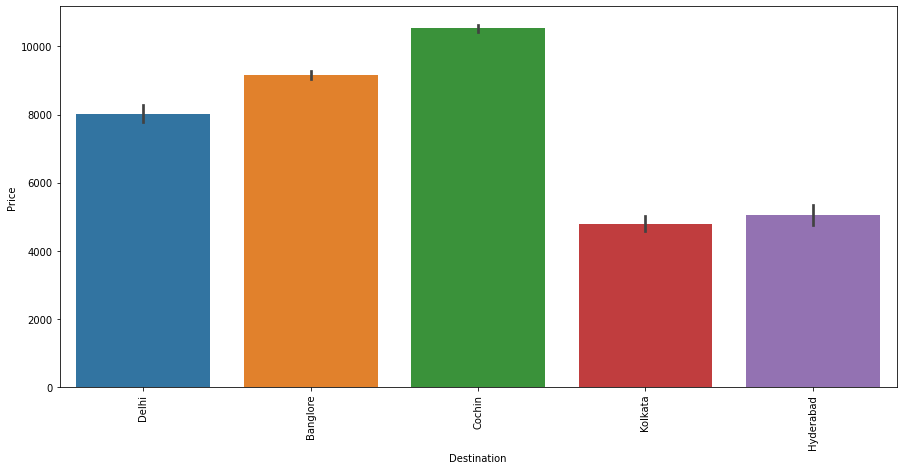

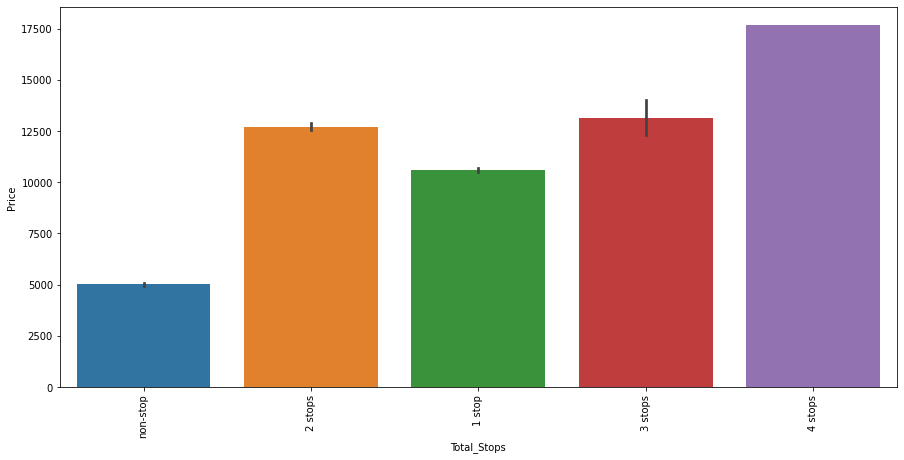

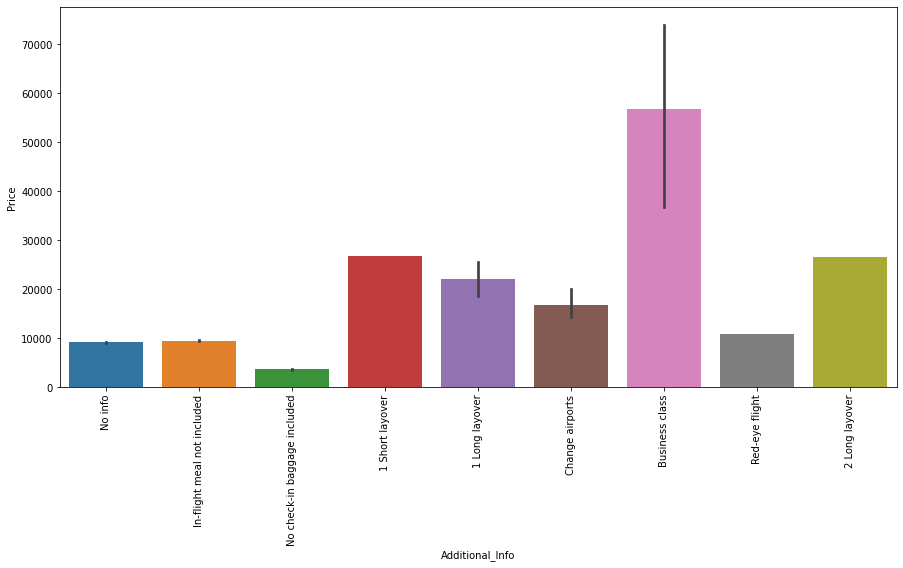

In [39]:
#def a function to look at bar plot of some important categorical variable
def drawplt(col):
  plt.figure(figsize=(15,7))
  sns.barplot(x=df[col],y=df['Price'])
  plt.xticks(rotation='vertical')

tolook=['Airline','Source','Destination','Total_Stops','Additional_Info']
for col in tolook:
  drawplt(col)

# feature engineering

In [40]:
data=df.copy()

In [41]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# ***spliting the date*** 

In [42]:
data['Date']=data['Date_of_Journey'].str.split('/').str[0]
data['Month']=data['Date_of_Journey'].str.split('/').str[1]    #using split
data['Year'] =pd.DatetimeIndex(data['Date_of_Journey']).year    #using DatetimeIndex

In [43]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


#since we have data of only one year we drop year column 

In [44]:
data=data.drop(['Date_of_Journey','Year'],axis=1)

# ***checking the arrival time***

In [45]:
#we dont need month in arrival time so removing it
data['Arrival_Time']=data['Arrival_Time'].str.split(' ').str[0]  #splitting it on the basis of space and taking only 0th index value i.e time

In [46]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,06
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03


# ***Total_Stops***

In [47]:
#now lets check total_stop column
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
data['Total_Stops']=data['Total_Stops'].replace('non-stop','0 stop')

In [49]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05


In [50]:
# making 'stop' column as numeric
data['Stop']=data['Total_Stops'].str.split(' ').str[0]
#we can also use label encoder and assign value to each categorise 

In [51]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Stop
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,03,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2


In [52]:
data=data.drop(['Total_Stops'],axis=1)

# convert all features to numerical variables

In [53]:
# Arrival_Time

data['Arrival_Hour']=data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minute']=data['Arrival_Time'].str.split(':').str[1]

In [54]:
data=data.drop(['Arrival_Time'],axis=1)

In [55]:
# Dep_Time

data['Departure_Hour']=data['Dep_Time'].str.split(':').str[0]
data['Departure_Minute']=data['Dep_Time'].str.split(':').str[1]
data=data.drop(['Dep_Time'],axis=1)

In [56]:
data=data.drop(['Route'],axis=1)

In [57]:
data.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,Delhi,2h 50m,No info,3897,24,03,0,01,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,1,05,2,13,15,05,50
2,Jet Airways,Delhi,Cochin,19h,No info,13882,9,06,2,04,25,09,25
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,12,05,1,23,30,18,05
4,IndiGo,Banglore,Delhi,4h 45m,No info,13302,01,03,1,21,35,16,50


# can aslo use split function to split duration

data['Duration_hr']=data['Duration'].str.split(' ').str[0]

data['Duration_min']=data['Duration'].str.split(' ').str[1]

data['Duration_hr']=data['Duration_hr'].str.split('(\d+)').str[1]

data['Duration_min']=data['Duration_min'].str.split('(\d+)').str[1]

In [58]:
#duration 
def get_duration(x):
    x=x.split(' ')    #will split all string '2h 50m'--->['2h', '50m']
    hours=0           #initializing hours variable
    mins=0            #initializing mins var
    if len(x)==1:     #len(x)==1--->returns true or false and if  this condition gives true---->only h data is present (ex 19h will have only one string anf 2h 50m will have two string)
        x=x[0]        #i.e extract first index ,if its ['19h',''] then pick 19h
        if x[-1]=='h':    # if 19h string has h at last index
            hours=int(x[:-1])        #store all digit other than h and convert it into int
        else:                         #else if we have only data as 50m
            mins=int(x[:-1])          #just extract 50 out of it
    else:     #i.e if we have complete 2h 50m
        hours=int(x[0][:-1])        #store 2 from 2h in hours
        mins=int(x[1][:-1])         #store 50 from 50m in mins
    return hours,mins
data['Duration_hours']=data.Duration.apply(lambda x:get_duration(x)[0])
data['Duration_mins']=data.Duration.apply(lambda x:get_duration(x)[1])
data.drop(["Duration"], axis = 1, inplace = True)

In [59]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,No info,3897,24,03,0,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,No info,7662,1,05,2,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,No info,13882,9,06,2,04,25,09,25,19,0
3,IndiGo,Kolkata,Banglore,No info,6218,12,05,1,23,30,18,05,5,25
4,IndiGo,Banglore,Delhi,No info,13302,01,03,1,21,35,16,50,4,45


## converting all nominal categorical value into numerical using one hot encoding as almost all are nominal data.
  


In [60]:
data=pd.get_dummies(data=data, columns=['Airline','Source','Destination'],drop_first= True)

In [61]:
data.head()

,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,No info,3897,24,03,0,01,10,22,20,2,...,0,0,0,0,0,0,0,1,0,0
1,No info,7662,1,05,2,13,15,05,50,7,...,0,0,0,0,1,0,0,0,0,0
2,No info,13882,9,06,2,04,25,09,25,19,...,0,0,0,1,0,0,1,0,0,0
3,No info,6218,12,05,1,23,30,18,05,5,...,0,0,0,0,1,0,0,0,0,0
4,No info,13302,01,03,1,21,35,16,50,4,...,0,0,0,0,0,0,0,1,0,0


In [62]:
#using label encoder for Additional_info
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data["Additional_Info"]=le.fit_transform(data['Additional_Info'])


In [63]:
data.shape

(10683, 30)

In [64]:
data.head()

,Additional_Info,Price,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,7,3897,24,03,0,01,10,22,20,2,...,0,0,0,0,0,0,0,1,0,0
1,7,7662,1,05,2,13,15,05,50,7,...,0,0,0,0,1,0,0,0,0,0
2,7,13882,9,06,2,04,25,09,25,19,...,0,0,0,1,0,0,1,0,0,0
3,7,6218,12,05,1,23,30,18,05,5,...,0,0,0,0,1,0,0,0,0,0
4,7,13302,01,03,1,21,35,16,50,4,...,0,0,0,0,0,0,0,1,0,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Additional_Info                            10683 non-null  int64 
 1   Price                                      10683 non-null  int64 
 2   Date                                       10683 non-null  object
 3   Month                                      10683 non-null  object
 4   Stop                                       10682 non-null  object
 5   Arrival_Hour                               10683 non-null  object
 6   Arrival_Minute                             10683 non-null  object
 7   Departure_Hour                             10683 non-null  object
 8   Departure_Minute                           10683 non-null  object
 9   Duration_hours                             10683 non-null  int64 
 10  Duration_mins                     

In [66]:
#removing the row with missing value
data = data.dropna(how='any',axis=0) 

In [67]:
data.columns

Index(['Additional_Info', 'Price', 'Date', 'Month', 'Stop', 'Arrival_Hour',
       'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',
       'Duration_hours', 'Duration_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'],
      dtype='object')

In [68]:
cols=['Date', 'Month', 'Stop', 'Arrival_Hour',
       'Arrival_Minute', 'Departure_Hour', 'Departure_Minute',]
for i in cols:
  data[cols]=data[cols].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# ***PRICE***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


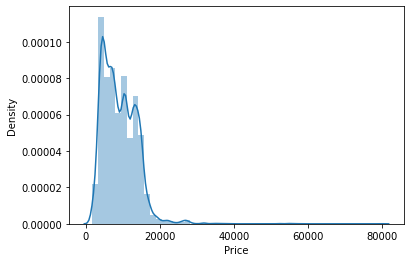

In [70]:
sns.distplot(data['Price'])

# **TRYING LINEAR MODEL ON OUR DATA**

In [71]:
X=data.drop(['Price'],axis=1)   #independent variable
y=data['Price']                 #dependent model

In [72]:
X.head()

,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,7,24,3,0,1,10,22,20,2,50,...,0,0,0,0,0,0,0,1,0,0
1,7,1,5,2,13,15,5,50,7,25,...,0,0,0,0,1,0,0,0,0,0
2,7,9,6,2,4,25,9,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,7,12,5,1,23,30,18,5,5,25,...,0,0,0,0,1,0,0,0,0,0
4,7,1,3,1,21,35,16,50,4,45,...,0,0,0,0,0,0,0,1,0,0


In [73]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=42)

# first fitting the data into linear model

In [65]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [66]:
#score for Linear model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.6398317285141993
0.6394521298230558


# ***RIDGE REGRESSION***

In [67]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)    #alpha is nothing but lambda
ridge.fit(X_train,y_train)


Ridge(alpha=0.3)

In [68]:
# score for Ridge model
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6395640015647666
0.6391538989634957


# ***LASSO REGRESSION***

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [70]:
#score for Lasso model
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6398224181069425
0.6394355420177513


# now moving towards more complex model,now our line wont be straight line anymore

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
#restricting dimensions to 2 only

In [73]:
from sklearn import linear_model
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
# now new test training set will get new columns of x1x2,x1x3 and so on ,ie we will also include interaction terms

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

In [74]:
X_train2.shape
#now we have 436 interaction terms or 466 columns

(7477, 436)

# ***POLYNOMIAL MODEL***

In [75]:
#score for simple polynomial model
print(poly_clf.score(X_train2, y_train))
print(poly_clf.score(X_test2, y_test))

0.7568860495771679
0.7497727892330277


# ***USING RIDGE***

In [76]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train2,y_train)
print(ridge.score(X_train2, y_train)) #in sample r2 score 
print(ridge.score(X_test2, y_test))    #out of sample r2 score

0.7567827766273583
0.7490632007376468


# ***USING LASSO***

In [77]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train2,y_train)
print(lasso.score(X_train2, y_train))
print(lasso.score(X_test2, y_test))

0.7567887335347789
0.7435866509864998


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.974e+10, tolerance: 1.617e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


# ***USING RandomForestRegressor***

In [79]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)  #it will parameters by 

RandomForestRegressor()

In [81]:
y_pred = reg_rf.predict(X_test)

In [82]:
print(reg_rf.score(X_train, y_train))  #in sample score 
print(reg_rf.score(X_test, y_test))     #out of sample score


0.9822330882964766
0.8713399235588792


# so from our above observation we can clearly see that our model is an overfit model as its out of sample score is way less than in sample score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


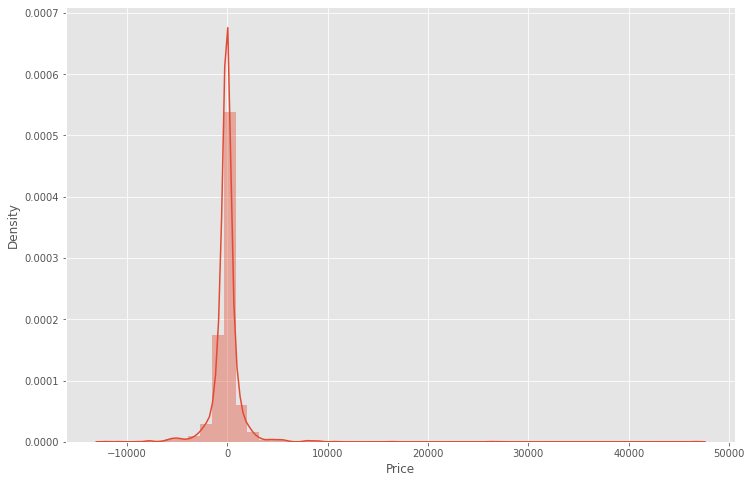

In [83]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

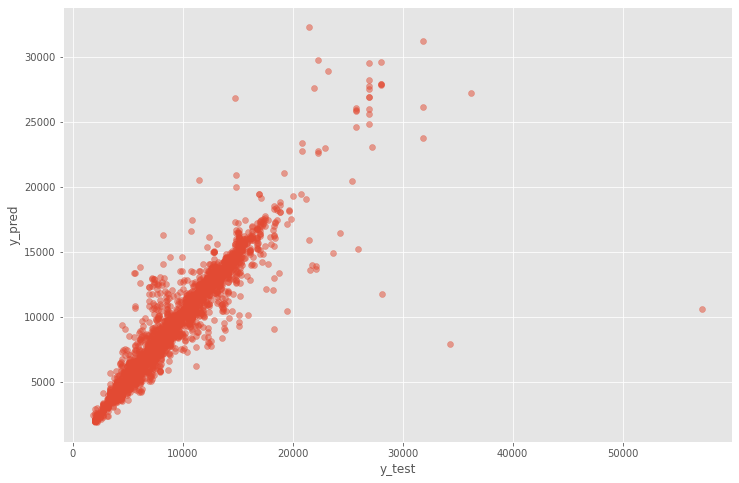

In [84]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [85]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 680.656098203452
MSE: 2624784.773165334
RMSE: 1620.1187527972552


In [86]:
metrics.r2_score(y_test, y_pred)

0.8713399235588792

# ***HYPERTUNING OUR MODEL***

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 15)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5, 7, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3, 5,8, 10]

In [89]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [90]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5,
                               verbose=2, random_state=42, n_jobs = 3)

In [92]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [93]:
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [95]:
reg_rf = RandomForestRegressor(max_depth=25,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=1200)

In [96]:
reg_rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=1200)

In [97]:
print(reg_rf.score(X_train, y_train))  #in sample score 
print(reg_rf.score(X_test, y_test))     #out of sample score

0.9825401750991699
0.8734989566603859


#still have overfitting

In [98]:
y_pred = reg_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


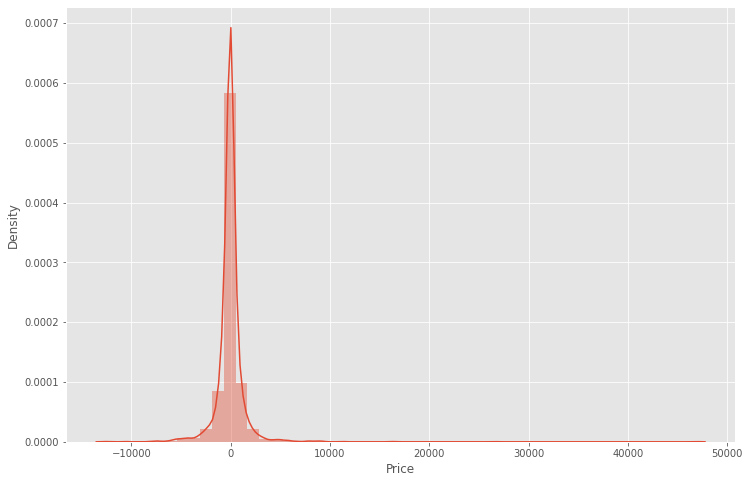

In [99]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred)
plt.show()

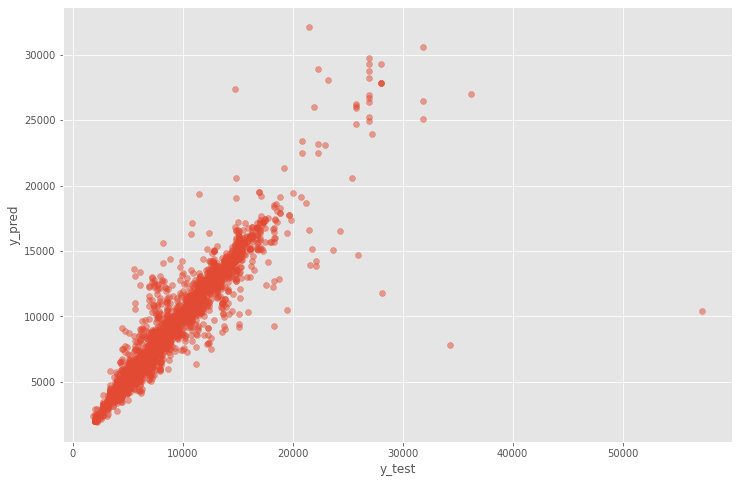

In [100]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [6]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: ignored

In [103]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [5]:
import pickle
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# USING AUTO SK LEARN

In [107]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (818 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking 

In [1]:
import autosklearn

In [2]:
import autosklearn.regression as reg

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [69]:
df_automl=data.copy

In [77]:
X_train

,Additional_Info,Date,Month,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
749,7,27,6,0,11,50,10,20,1,30,...,0,0,0,0,0,1,0,0,1,0
6077,7,21,6,0,19,40,17,10,2,30,...,0,0,0,0,1,0,0,0,0,0
2373,7,27,5,1,1,30,15,0,10,30,...,0,0,0,1,0,0,1,0,0,0
2442,7,9,5,1,10,40,22,40,12,0,...,0,0,0,0,1,0,0,0,0,0
5402,7,9,6,2,19,15,19,45,23,30,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,7,27,3,1,4,25,9,0,19,25,...,0,0,0,1,0,0,1,0,0,0
5191,5,9,5,1,20,45,14,5,6,40,...,0,0,0,0,1,0,0,0,0,0
5390,7,15,5,1,1,30,12,50,12,40,...,0,0,0,1,0,0,1,0,0,0
860,7,3,3,0,3,25,0,40,2,45,...,0,0,0,0,0,0,0,1,0,0


In [78]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=120,per_run_time_limit=30)

In [79]:
automl.fit(X_train,y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [80]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1              1.0  random_forest  0.125669  15.549106


In [81]:
print(automl.show_models())

{2: {'model_id': 2, 'rank': 1, 'cost': 0.1256694449970277, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f04c555c990>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f04c4cb7950>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f04c4eb31d0>, 'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)}}


In [82]:
print(automl.score(X_train, y_train))  #in sample score 
print(automl.score(X_test, y_test))     #out of sample score

0.9468003883568306
0.8606066217425754


#overfitting slightly reduced

In [83]:
ypred2= automl.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


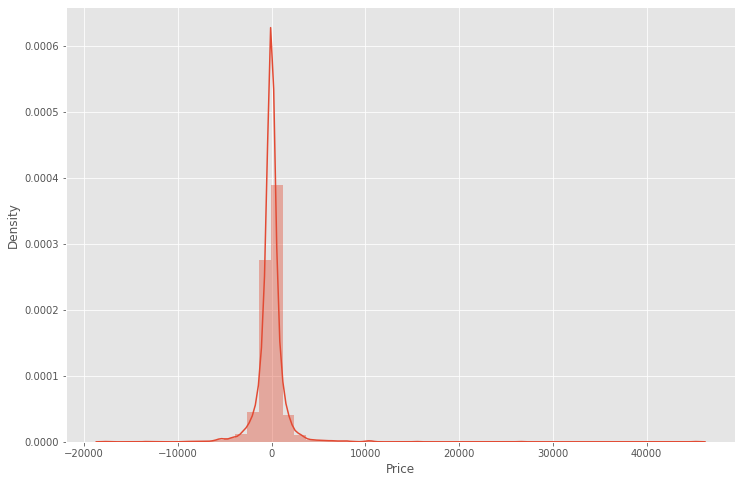

In [84]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(y_test-ypred2)
plt.show()

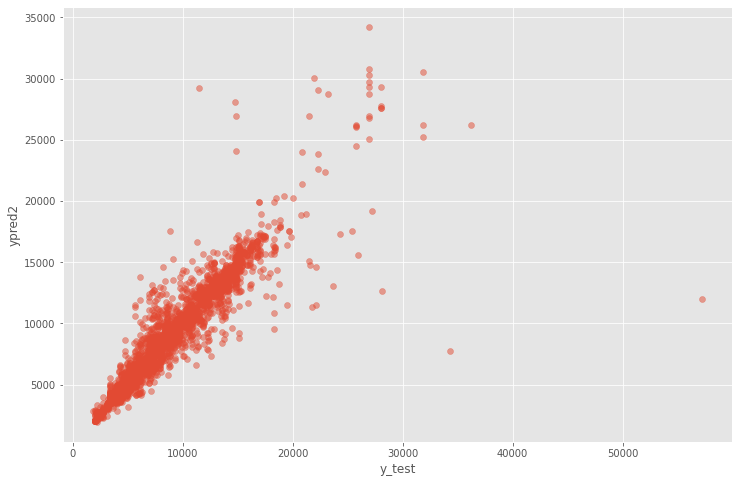

In [85]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test, ypred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

In [86]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, ypred2))
print('MSE:', metrics.mean_squared_error(y_test, ypred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred2)))

MAE: 747.5841623957928
MSE: 2843754.075473458
RMSE: 1686.3434037803386


In [87]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf_automl.pkl', 'wb')

# dump information to that file
pickle.dump(automl, file)

# ****LETS TRY FEATURE SELECTION****

# using extra tree regressor for feature selection

In [ ]:
data1=data.copy()
test=data1['Price']
train=data1.drop(['Price'],axis=1)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
er=ExtraTreesRegressor()
er.fit(train,test)

ExtraTreesRegressor()

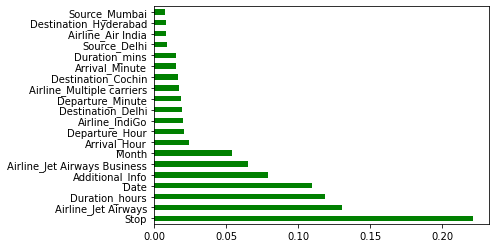

In [ ]:
series=pd.Series(er.feature_importances_,index=train.columns)
series.nlargest(25).plot(kind='barh',color='green')

In [ ]:
er.feature_importances_
#gives percentage of importance of feature to Price

array([7.92232288e-02, 1.09817181e-01, 5.37443044e-02, 2.21166310e-01,
       2.43142551e-02, 1.55216992e-02, 2.10702216e-02, 1.87285060e-02,
       1.18575486e-01, 1.53569548e-02, 8.60724859e-03, 1.98435569e-03,
       2.00335994e-02, 1.30623375e-01, 6.53932664e-02, 1.71324759e-02,
       8.27771474e-04, 5.64056247e-03, 1.15319653e-04, 4.32898884e-03,
       5.75977320e-05, 7.18407820e-04, 9.08690149e-03, 4.93079929e-03,
       7.88831980e-03, 1.69203274e-02, 1.91720273e-02, 8.39913911e-03,
       6.21369109e-04])

# using mutual informaation gain for feature selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mr=mutual_info_regression(train,test)

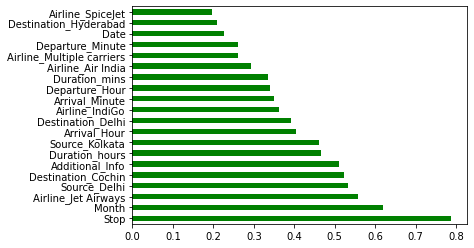

In [ ]:
plotdata=pd.Series(mr,index=train.columns)
plotdata.nlargest(25).plot(kind='barh',color='green')

In [ ]:

featcol = list(series.nlargest(25).index)
mutclasif = list(plotdata.nlargest(25).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['Month', 'Airline_Multiple carriers', 'Arrival_Minute', 'Source_Delhi', 'Airline_Jet Airways', 'Departure_Hour', 'Stop', 'Destination_Hyderabad', 'Airline_Air India', 'Destination_Delhi', 'Departure_Minute', 'Date', 'Duration_mins', 'Arrival_Hour', 'Airline_IndiGo', 'Destination_Cochin', 'Additional_Info', 'Duration_hours']


In [ ]:
train=data[commoncols]
train.head()

,Month,Airline_Multiple carriers,Arrival_Minute,Source_Delhi,Airline_Jet Airways,Departure_Hour,Stop,Destination_Hyderabad,Airline_Air India,Destination_Delhi,Departure_Minute,Date,Duration_mins,Arrival_Hour,Airline_IndiGo,Destination_Cochin,Additional_Info,Duration_hours
0,3,0,10,0,0,22,0,0,0,1,20,24,50,1,1,0,7,2
1,5,0,15,0,0,5,2,0,1,0,50,1,25,13,0,0,7,7
2,6,0,25,1,1,9,2,0,0,0,25,9,0,4,0,1,7,19
3,5,0,30,0,0,18,1,0,0,0,5,12,25,23,1,0,7,5
4,3,0,35,0,0,16,1,0,0,1,50,1,45,21,1,0,7,4


In [ ]:
train.shape

(10682, 18)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.15,random_state=2)
X_train.shape,X_test.shape

((9079, 18), (1603, 18))

# ***LINEAR REGRESSION***

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
#score for Linear model
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.5782310584767252
0.5186196603510973
